#### _Matin's Lab Rotation 3 - BCFO_ | [PREVIOUS](02_consortia_model.ipynb)
# 05. Test dFBA

In [1]:
import mmodes

In [2]:
# Simulate growth of consortia with CRISPR inactivated

In [3]:
cons = mmodes.Consortium(stcut = 1e-7, 
                         mets_to_plot = [#"glc__D_e", 
                                         "xyl__D_e", 
                                         #"ac_e", 
                                         "xylt_e", 
                                         "isobuta_e"], 
                         v = 1, 
                         manifest = "mmodes/simulation/COMETS_manifest.txt"
                        )
path_to_model1 = 'result/iML1515_xylitol_strain.xml' 
path_to_model2 = 'result/iML1515_isobutyric_strain.xml' 

glc = mmodes.dMetabolite(id = "glc__D_e", Km = 1480., Vmax = 130.)
xyl = mmodes.dMetabolite(id = "xyl__D_e", Km = 1480., Vmax = 130.)
ace = mmodes.dMetabolite(id = "ac_e", Km = 1480., Vmax = 130.)

cons.add_model(path_to_model1, 0.01, solver = "gurobi", method = "fba", dMets = {glc.id: glc, xyl.id: xyl, ace.id: ace})
cons.add_model(path_to_model2, 0.01, solver = "gurobi", method = "fba", dMets = {glc.id: glc, xyl.id: xyl, ace.id: ace})

Using license file /home/matinnu/gurobi.lic
Academic license - for non-commercial use only


In [4]:
abs_media = {k: 1000.0 for k in cons.media}
cons.media = cons.set_media(abs_media)

#print(cons)
cons.media["glc__D_e"] = 75.0
cons.media["xyl__D_e"] = 75.0
cons.media["ac_e"] = 0.0
cons.media["xylt_e"] = 0.0
cons.media["isobuta_e"] = 0.0

Running... [#####---------------] 24.00%
Stationary state has been reached.



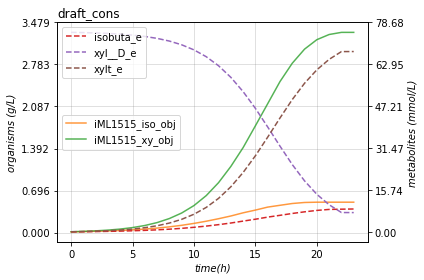

In [5]:
cons.run(maxT = 100, 
         outp = "mmodes/simulation/plot_dFBA_test1.png", 
         outf = "mmodes/simulation/tab_dFBA_test1.tsv", 
         verbose=True, 
         integrator = "fea", 
         stepChoiceLevel = (1,500.0,1000)
        )

In [6]:
# 6) print stuff on screen
for mod in cons.models:
    print(mod, cons.models[mod].volume.q, sep = " -> ")
print("Glucose", str(cons.media["glc__D_e"]), sep = " -> ")
print("Xylose", str(cons.media["xyl__D_e"]), sep = " -> ")
print("Isobutyric acid", str(cons.media["isobuta_e"]), sep = " -> ")
print("Acetate", str(cons.media["ac_e"]), sep = " -> ")
print("Xylitol", str(cons.media["xylt_e"]), sep = " -> ")
print()

iML1515_xy_obj -> 3.3139571178793523
iML1515_iso_obj -> 0.5034669496363973
Glucose -> 3.1813915602977763
Xylose -> 7.261312749539176
Isobutyric acid -> 8.613540791580006
Acetate -> 0
Xylitol -> 67.73868725046081

